# skew

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

Метод skew() в Pandas оцінює асиметрію розподілу числових ознак. Він базується на формулі моментного коефіцієнта асиметрії

Значення skew() інтерпретується так:

0 або близько 0 → розподіл симетричний
- Додатне значення (>0) → "хвіст" праворуч (правобічна асиметрія)
- Від’ємне значення (<0) → "хвіст" ліворуч (лівобічна асиметрія)

Висновки на основі skew()
- Якщо skewness ≈ 0, то розподіл можна вважати нормальним. Це корисно при використанні моделей, чутливих до нормальності (наприклад, лінійної регресії).
- Якщо skewness > 1 або < -1, це означає, що розподіл значно асиметричний. У таких випадках може знадобитися трансформація (наприклад, логарифмічна або Box-Cox), щоб зробити розподіл ближчим до нормального.
- Сильна асиметрія може свідчити про викиди. Наприклад, у правобічному розподілі кілька дуже великих значень можуть "тягнути" середнє праворуч.
- Лівобічна асиметрія (від'ємний skewness) може вказувати на ефект граничного значення (наприклад, оцінки студентів, які зазвичай не можуть бути нижче 0, але можуть бути високо скупчені вгорі).
- Правобічна асиметрія (додатний skewness) часто зустрічається у фінансових даних (наприклад, прибутки компаній, де більшість значень малі, але деякі можуть бути дуже великими).

In [2]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

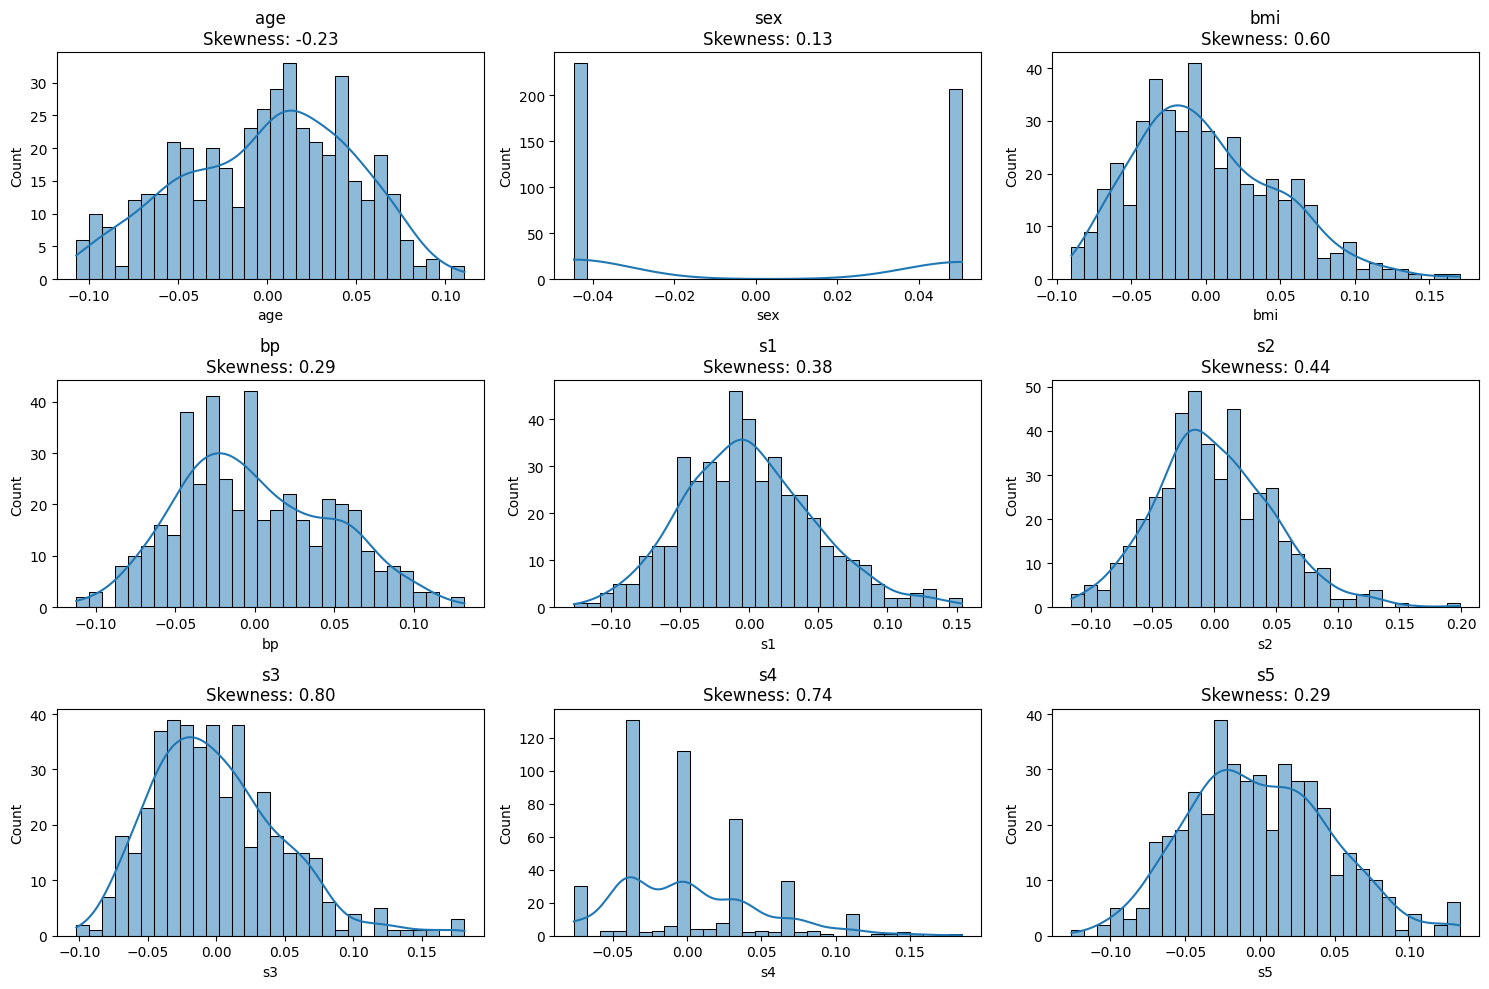

Skewness of numerical features:
 age   -0.231382
sex    0.127385
bmi    0.598148
bp     0.290658
s1     0.378108
s2     0.436592
s3     0.799255
s4     0.735374
s5     0.291754
s6     0.207917
dtype: float64


In [3]:
# Обчислюємо асиметрію для числових стовпців
skewness = df.skew(numeric_only=True)

# Візуалізація гістограм
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns[:9]):  # Візьмемо перші 9 фіч для прикладу
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"{col}\nSkewness: {skewness[col]:.2f}")

plt.tight_layout()
plt.show()

# Виведемо асиметрію числових колонок
print("Skewness of numerical features:\n", skewness)

# kurt

Метод kurt() у Pandas обчислює екскес (kurtosis) — показник, що вимірює, наскільки "важкі" хвости розподілу порівняно з нормальним.

Як інтерпретувати?

kurtosis≈0 (мезокуртичний розподіл)
📏 Нормальний розподіл, стандартна "дзвіночкова" форма.

kurtosis>0 (лептокуртичний розподіл)
🚀 Гострий пік, важкі хвости → більше екстремальних значень (наприклад, фінансові дані).

kurtosis<0 (платикуртичний розподіл)
🏔️ Плоский розподіл, менш виражені хвости (наприклад, рівномірний розподіл).

Чому важливо?

Допомагає визначити викиди — чим вищий kurt(), тим більше екстремальних значень.

Перевірка нормальності — нормальний розподіл має kurt() близький до 0.

Аналіз ризиків — у фінансах високий куртозис означає більшу ймовірність різких коливань.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [5]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

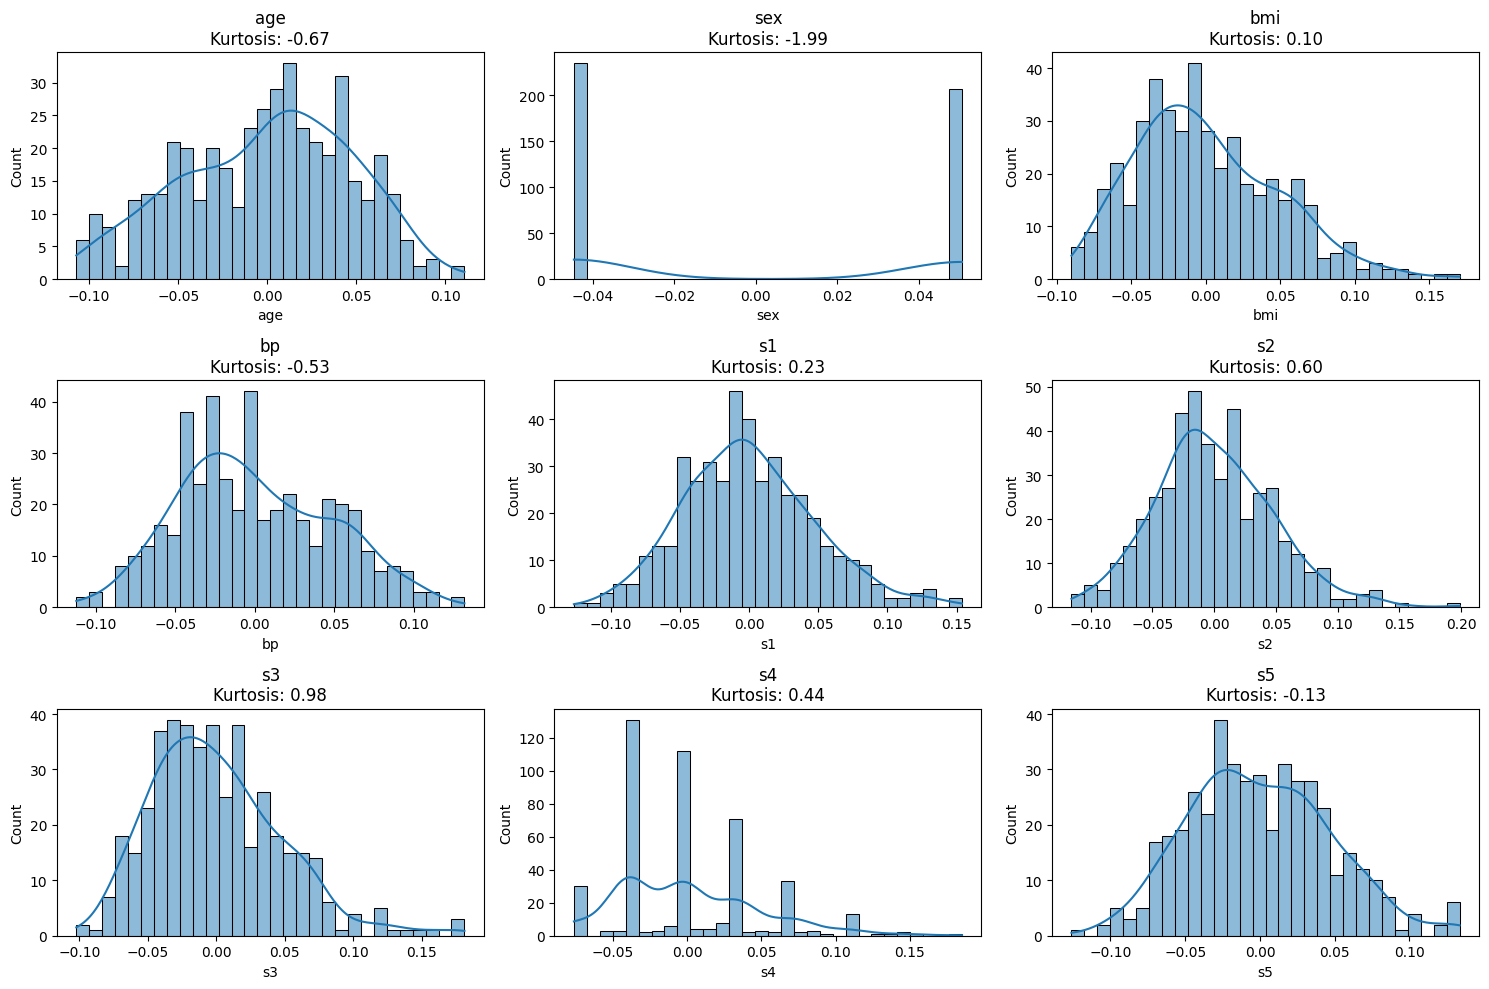

Kurtosis of numerical features:
 age   -0.671224
sex   -1.992811
bmi    0.095094
bp    -0.532797
s1     0.232948
s2     0.601381
s3     0.981507
s4     0.444402
s5    -0.134367
s6     0.236917
dtype: float64


In [6]:
# Обчислюємо куртозис
kurtosis_values = df.kurt(numeric_only=True)

# Візуалізація
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns[:9]):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"{col}\nKurtosis: {kurtosis_values[col]:.2f}")

plt.tight_layout()
plt.show()

# Виводимо куртозис
print("Kurtosis of numerical features:\n", kurtosis_values)